In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [201]:
df = pd.read_csv('/content/data.csv')

In [202]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [203]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [204]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [205]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [206]:
# M -> Malignint
# B -> Benign

In [207]:
# Supervised -> target
# unsupervised

In [208]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [210]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


<Axes: >

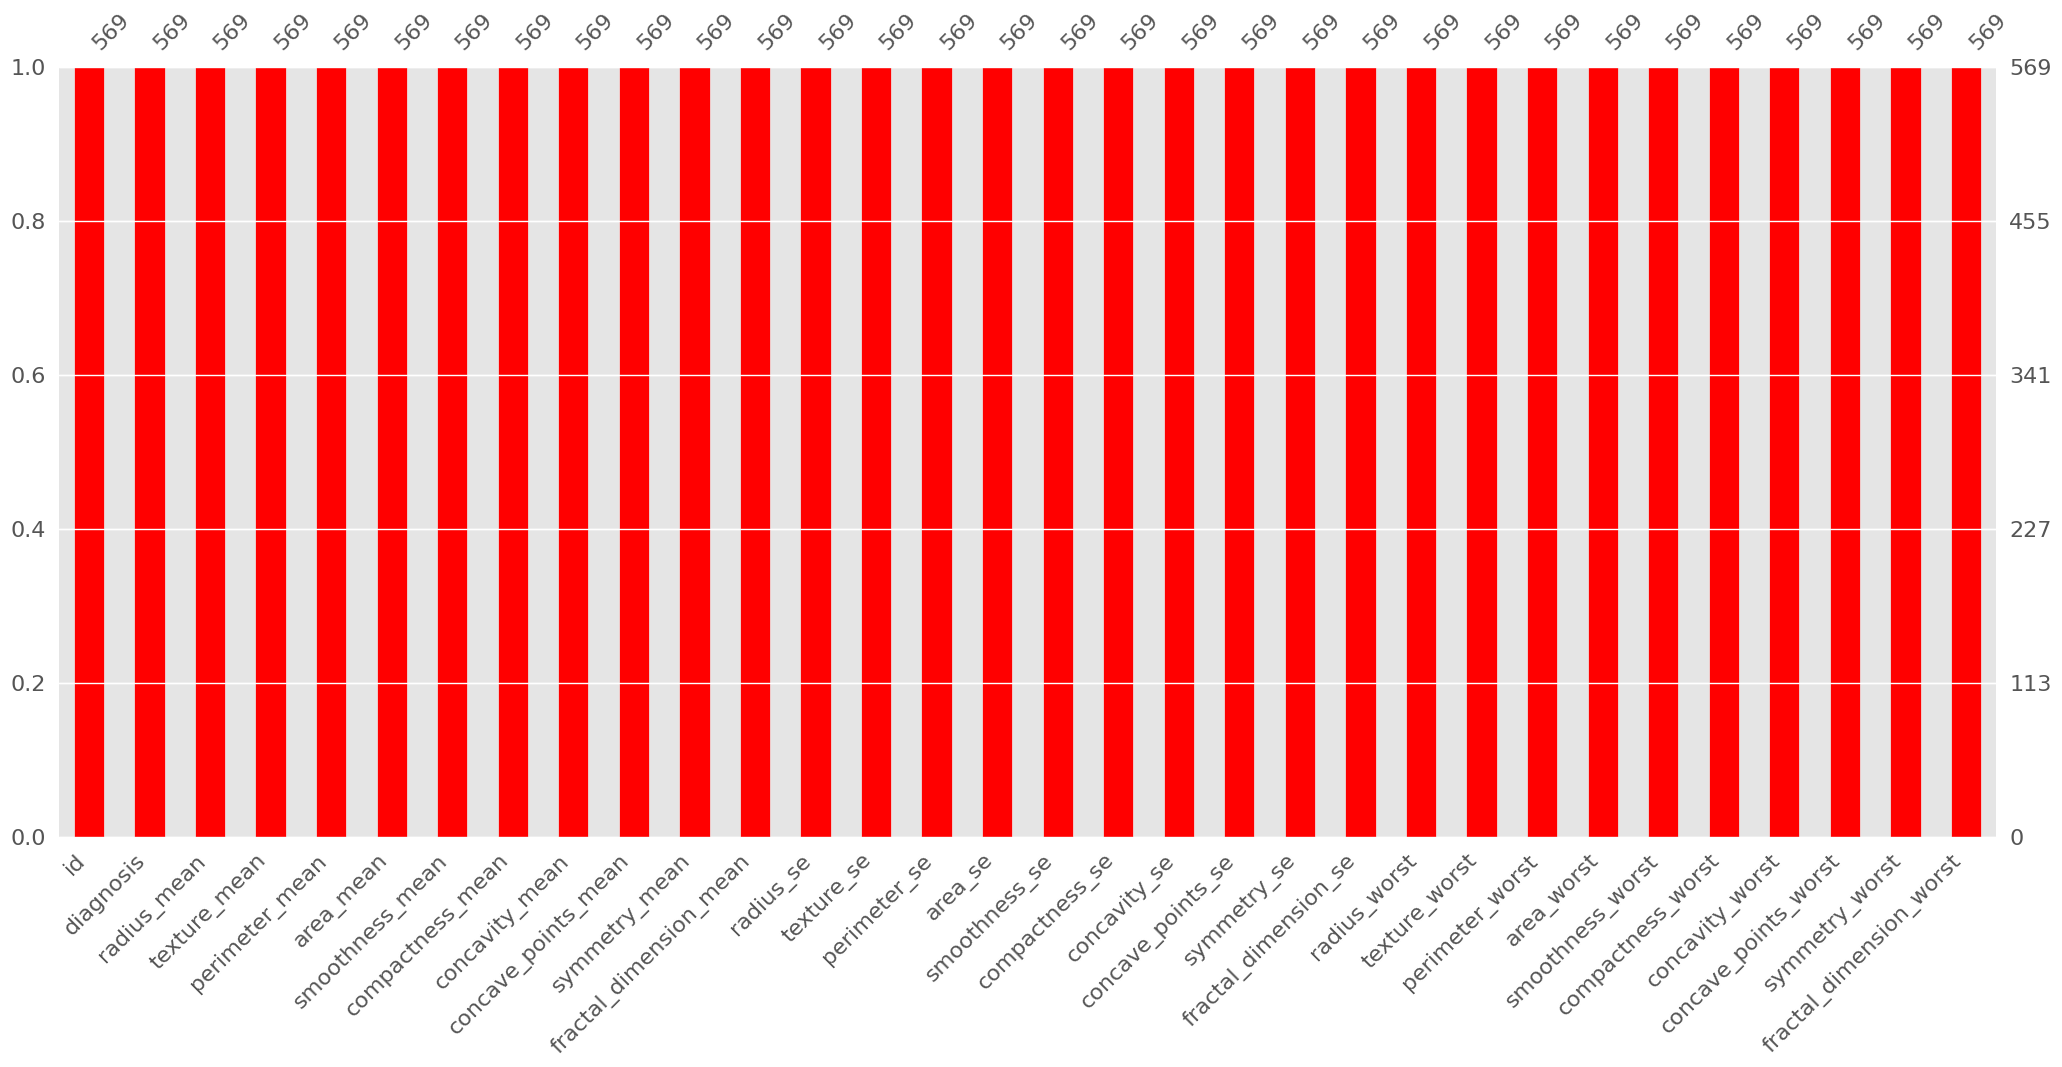

In [211]:
# Checking the missing values in a bar plot
msno.bar(df, color='red')

no missing values in the dataset

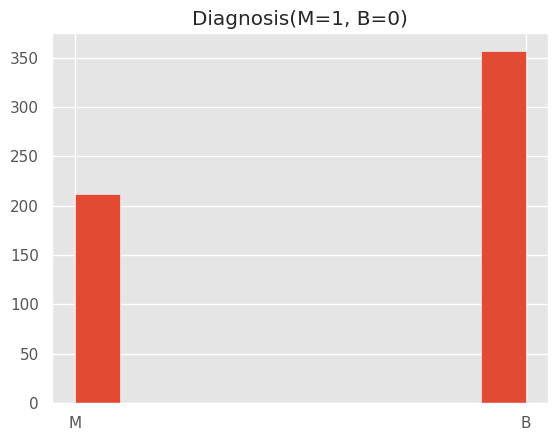

In [212]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

In [213]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

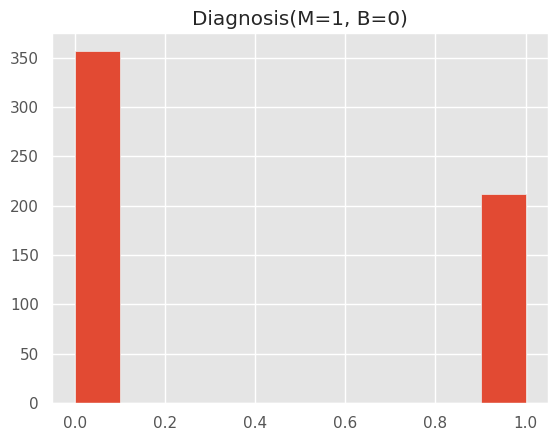

In [214]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1, B=0)')
plt.show()

# EDA

DENSITY GRAPH

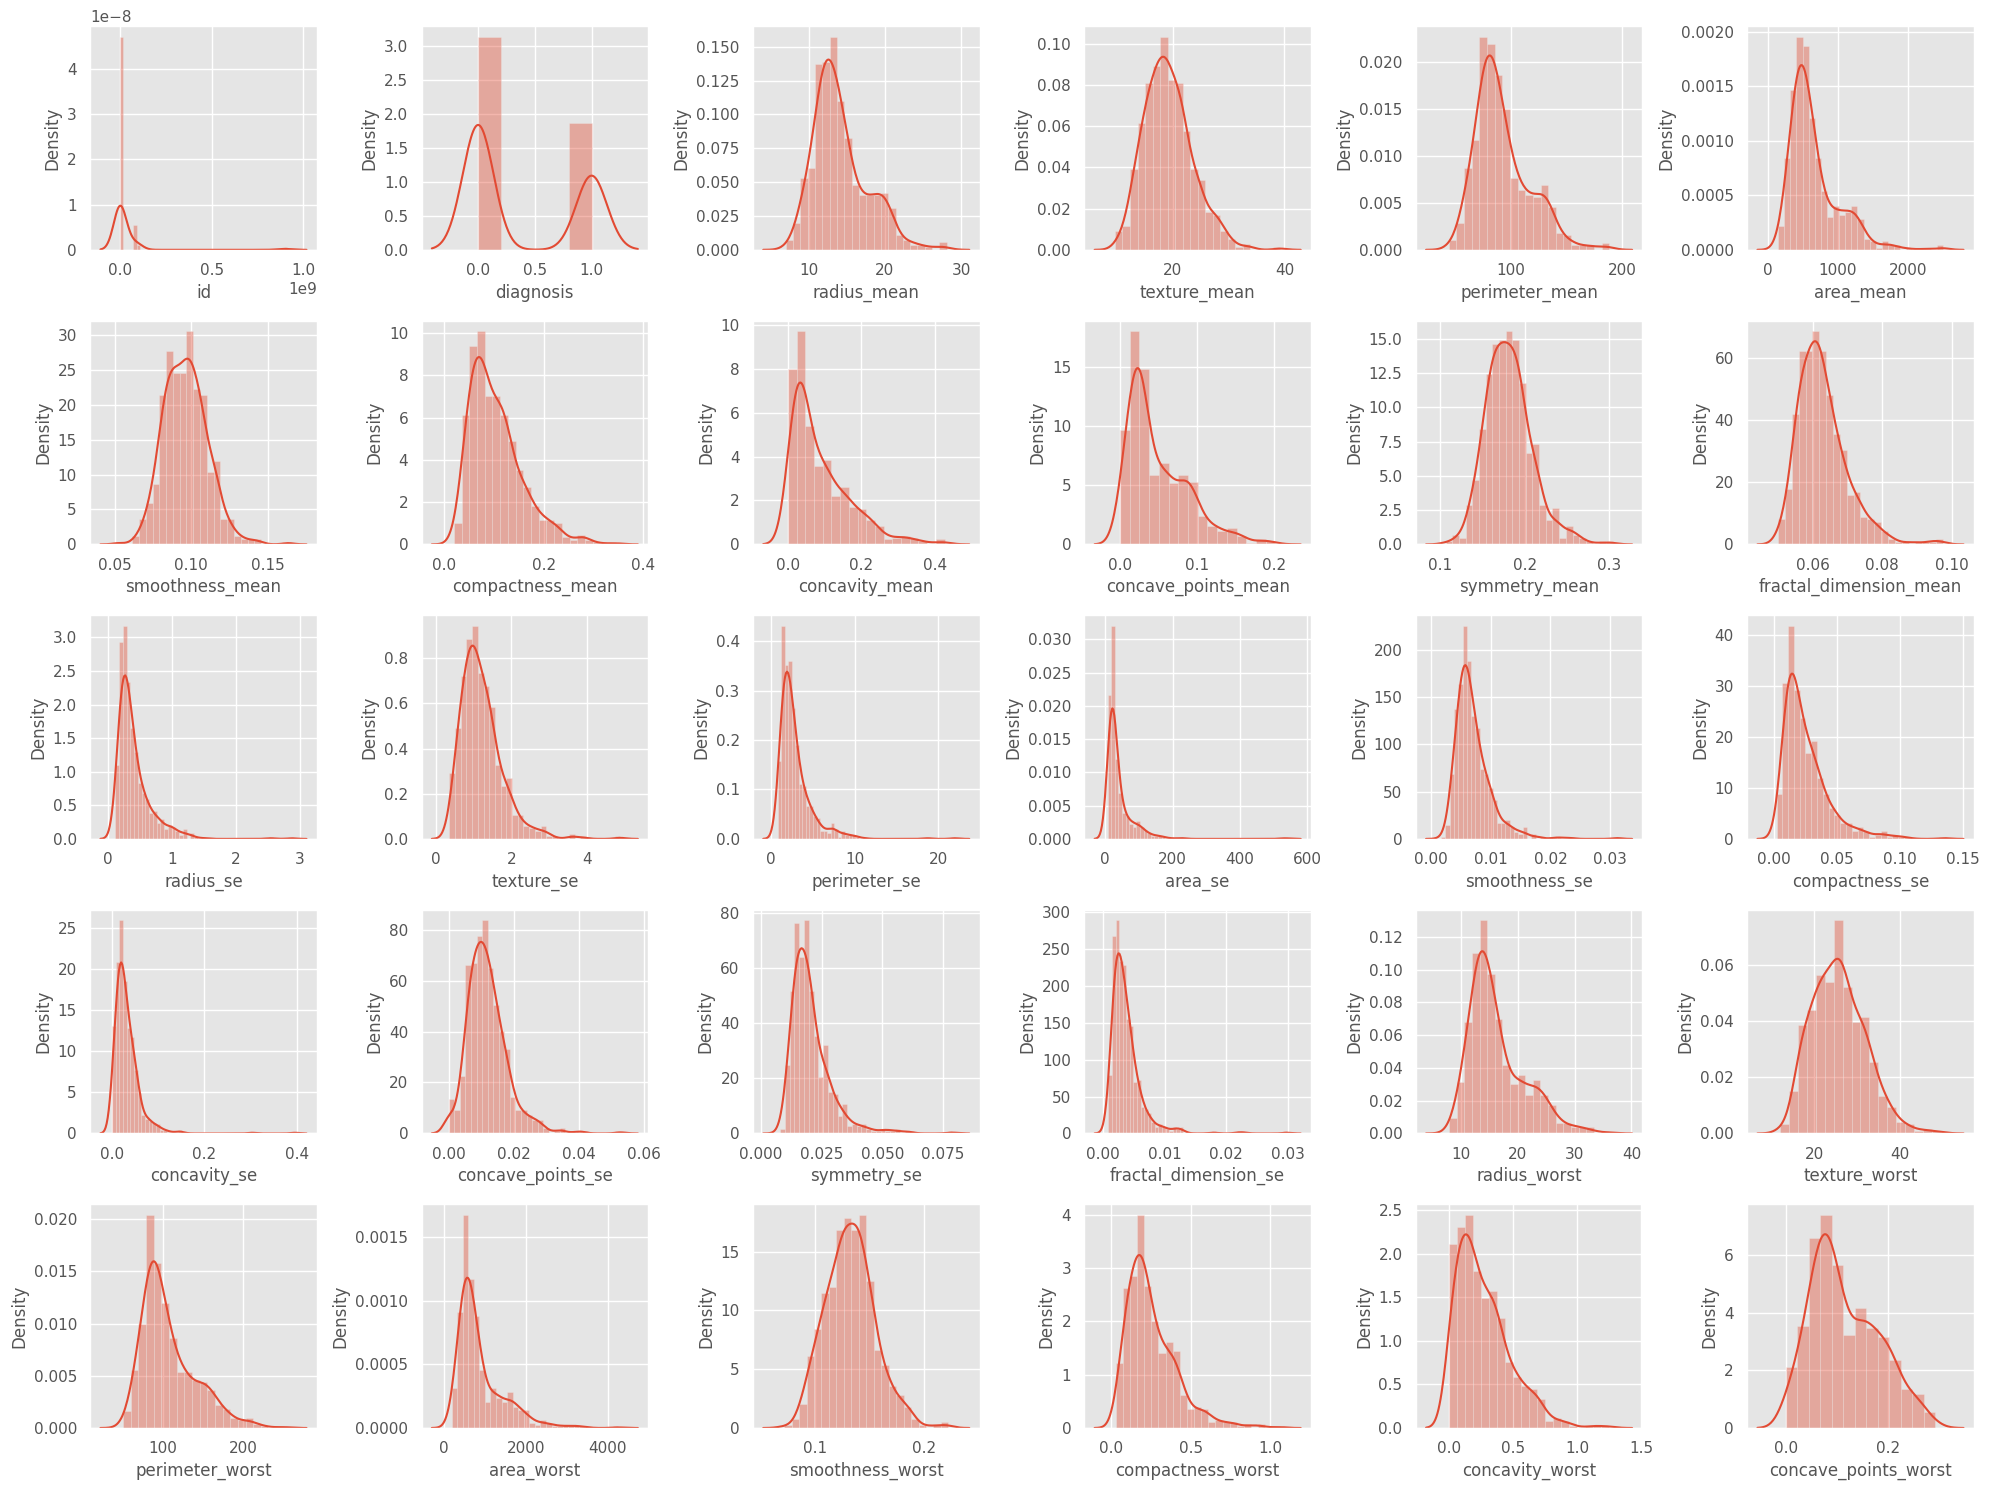

In [215]:
# each 5 row its having 6 columns

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
  if plotnumber<=30:
    ax = plt.subplot(5,6, plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber+=1

plt.tight_layout()
plt.show()

In [216]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


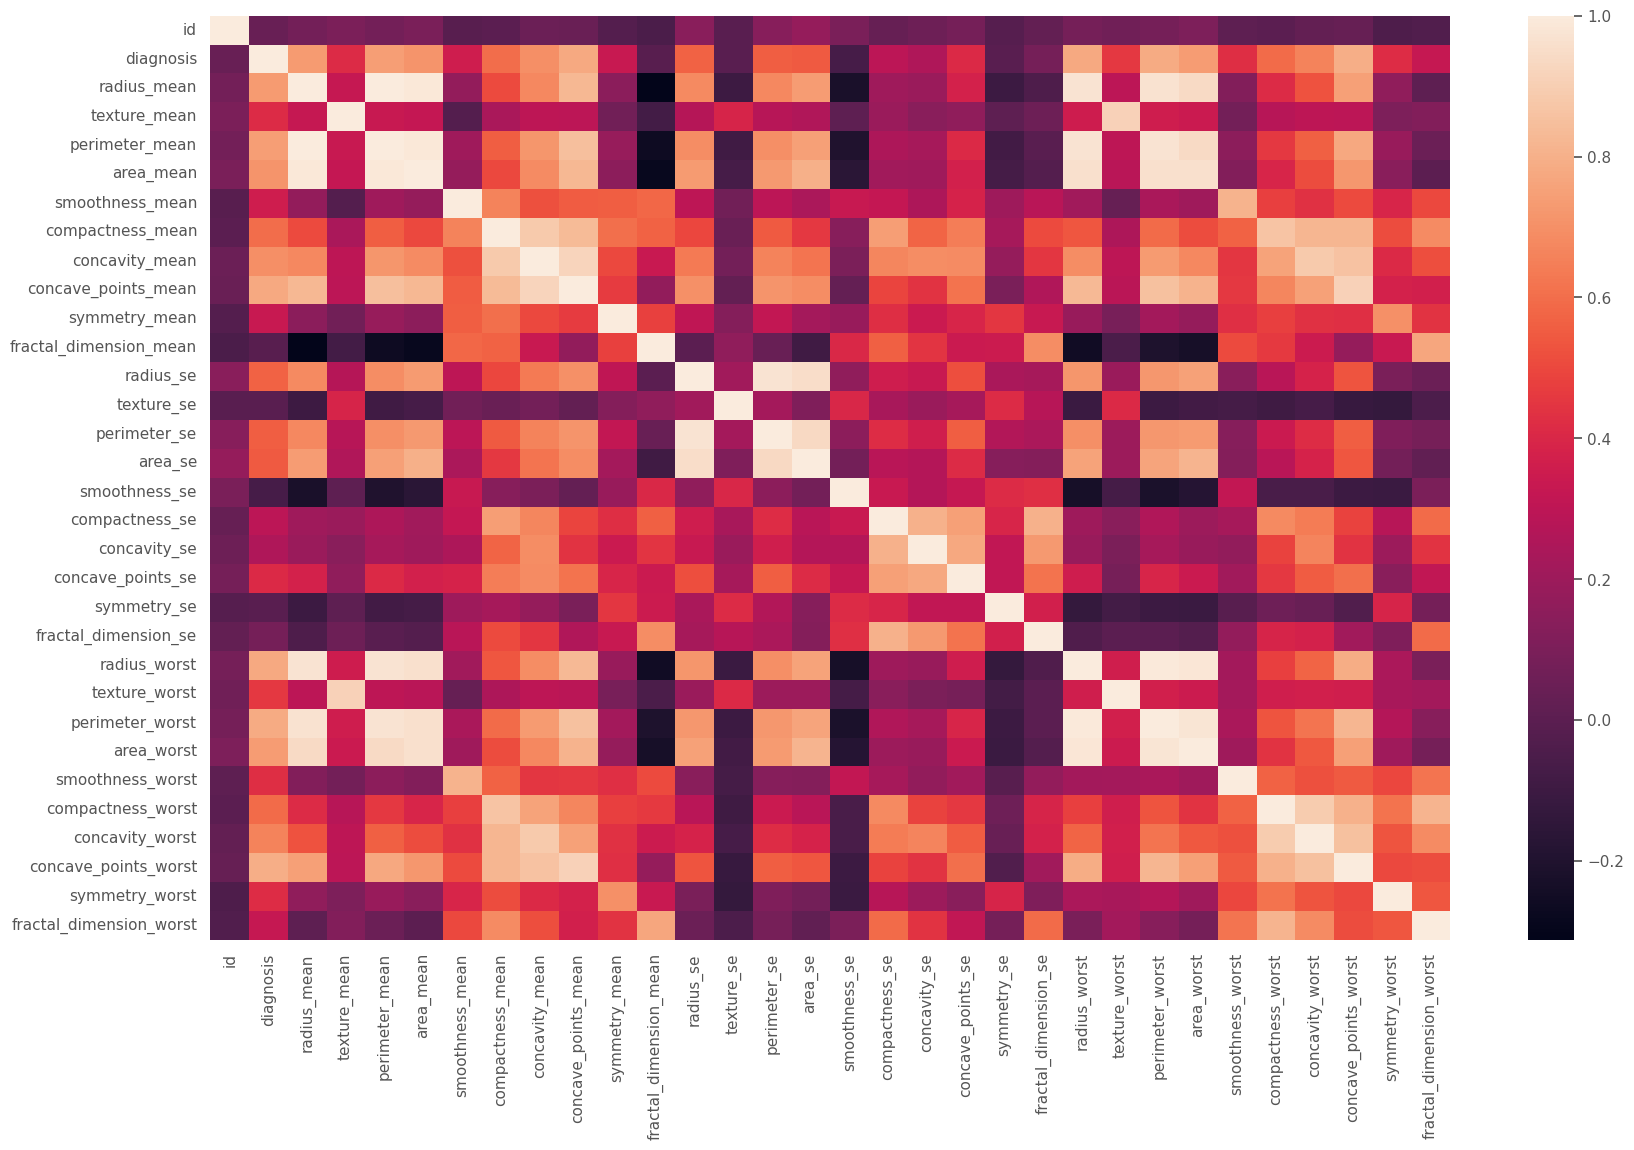

In [217]:
#heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr())
plt.show()

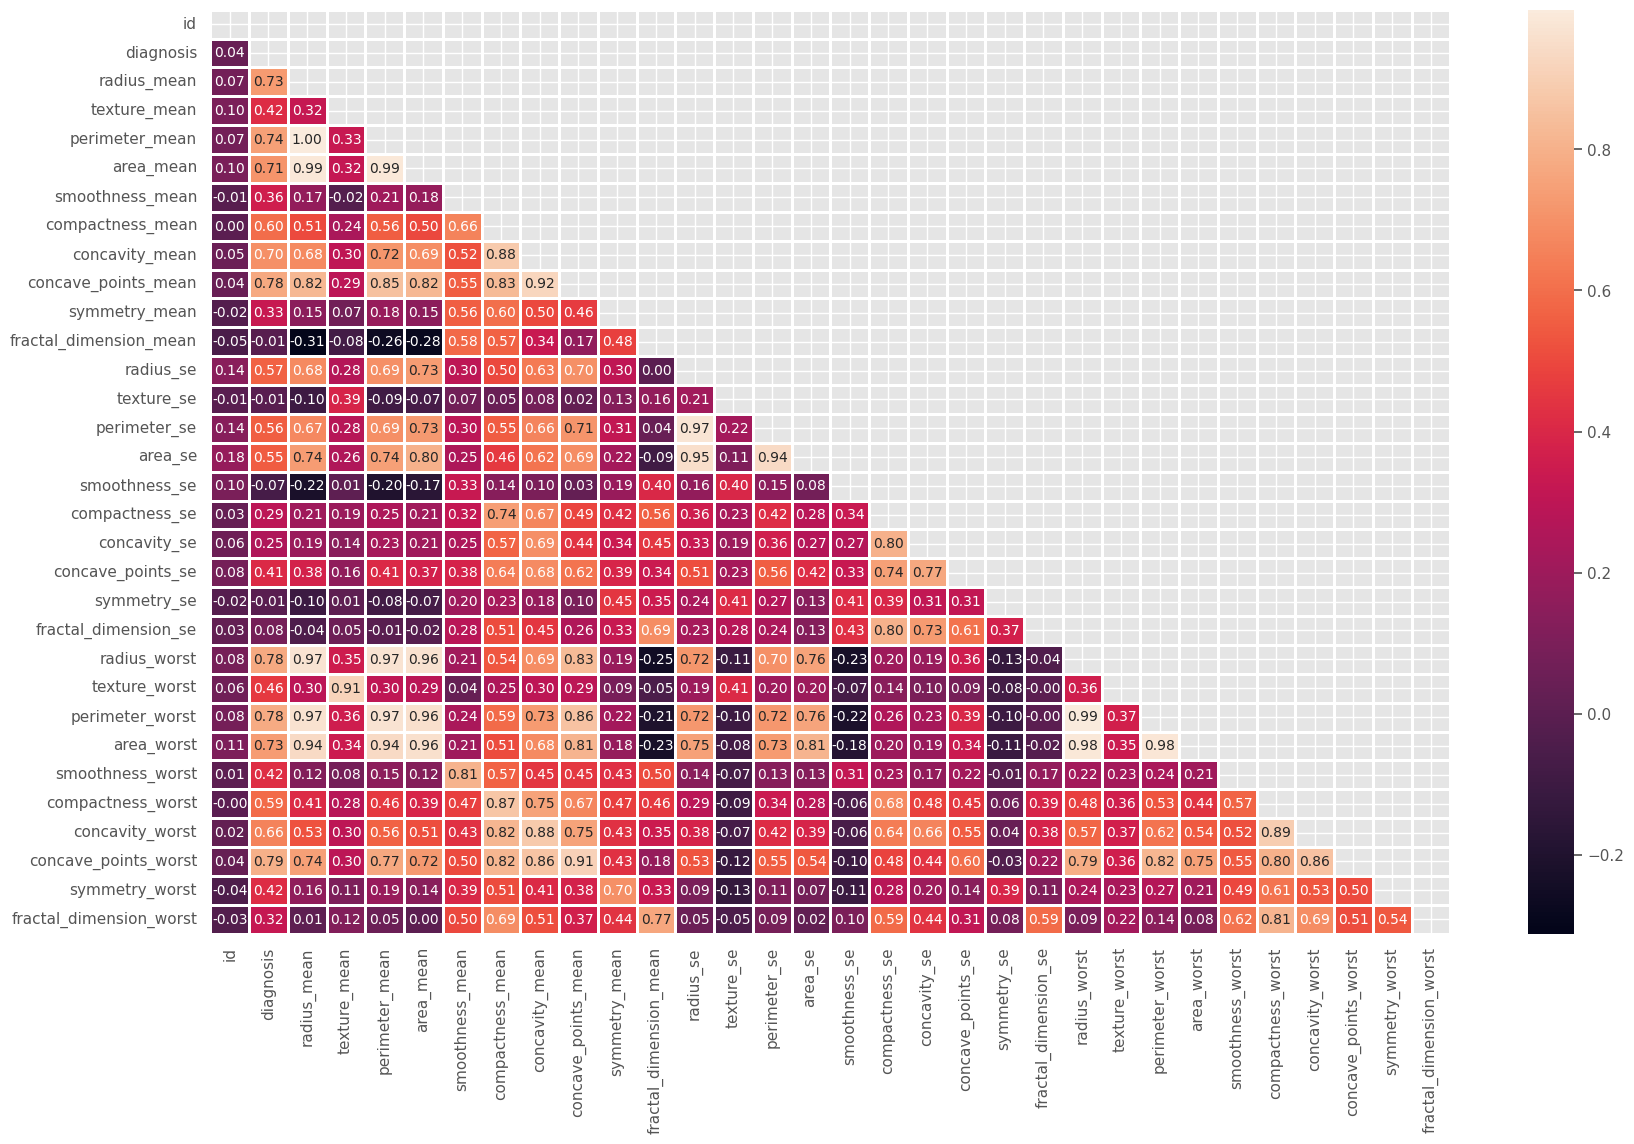

In [218]:
#heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt='.2f')
plt.show()

In [219]:
# highly correlated features
# multicollinearity

In [220]:
df.drop(columns='id', axis=1, inplace=True)

In [221]:
#Feature selection
# dropping the highly correlated feature
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop =[x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop,axis=1)

print(df.shape[1])

23


In [222]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

32 features reduce it 23 now

In [223]:
x = df.drop(columns='diagnosis', axis=1)

In [224]:
y = df['diagnosis']

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                                    test_size=0.2)

In [226]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [227]:
x_train.shape

(455, 22)

APPLY MACHINE LEARNING ALGORITHIMS

In [228]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [229]:
y_pred = log_reg.predict(x_test)

In [230]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(x_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(x_test))
print(log_reg_acc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



So your model performs slightly better on training data but generalizes well — no major overfitting.

Confusion Matrix
[[66  1]
 [ 3 44]]

	Predicted 0	Predicted 1
Actual 0	66 (True Negatives)	1 (False Positive)
Actual 1	3 (False Negatives)	44 (True Positives)

Interpretation

- Correctly predicted 66 + 44 = 110 of 114 samples

- Only 4 misclassifications (1 false positive, 3 false negatives)


Classification Report
Class	Precision	Recall	F1-Score	Support
0	0.96	0.99	0.97	67
1	0.98	0.94	0.96	47

Macro avg: 0.96
Weighted avg: 0.96
Accuracy: 0.96

Interpretation Summary
Metric	Meaning	Comment
Precision (for class 1)	Of all predicted 1s, 98% were correct.	Very good — few false positives.
Recall (for class 1)	Model found 94% of actual 1s.	Good — missed 3 of 47 positives.
F1-score	Balance between precision and recall.	Both classes around 0.96–0.97 = strong performance.
Accuracy	Overall correctness.	96% on test set is excellent.

In short the model:

- Performs very well on both classes.

- Has slightly fewer false negatives (3) and one false positive (1).

- Is balanced — no major bias toward one class.

- Shows strong generalization (train ≈ 98.9%, test ≈ 96.5%).

KNN

In [232]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [233]:
y_pred = knn.predict(x_test)

In [234]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0])

In [235]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(x_train)))
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(knn_acc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.967032967032967
0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



SVM

HYPERPARAMETER TUNING

In [236]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [237]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [238]:
grid_search.best_score_

np.float64(0.9802197802197803)

In [239]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(x_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [240]:
y_pred =svc.predict(x_test)

In [241]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [242]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(x_train)))
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(svc_acc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Decision TREE CLASSIFIER

In [243]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters ={
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [244]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [245]:
grid_search_dt.best_score_

np.float64(0.9626373626373625)

In [246]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter='random')

In [247]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [248]:
y_pred =dtc.predict(x_test)

In [249]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(x_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9604395604395605
0.9473684210526315
[[65  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



Random Forest Classifier

Passed the code

In [251]:
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier(criterion= 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [252]:
y_pred = rand_clf.predict(x_test)

In [253]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [254]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(x_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(x_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9956043956043956
0.9736842105263158
[[66  1]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Gradient Boosting Classifier

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [256]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [257]:
grid_search_gbc.best_score_

np.float64(0.9560727258675323)

In [258]:
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [259]:
y_pred = gbc.predict(x_test)

In [260]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [261]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(x_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)
y_pred = gbc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
0.9649122807017544
[[64  3]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



XGBClassifier

In [262]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [263]:
y_pred = xgb.predict(x_test)

In [264]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [265]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(x_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))
print(xgb_acc)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9473684210526315
[[64  3]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [266]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4),]
})
models.sort_values(by = 'Score', ascending=False)

,Model,Score
2,SVM,98.25
4,Random Forest Classifier,97.37
0,Logistic Regression,96.49
5,Gradient Boosting Classifier,96.49
1,KNN,95.61
3,Decision Tree Classifier,94.74
6,XGBoost,94.74


In [267]:
import pickle
model = svc
pickle.dump(model, open('breast_cancer.pk1','wb'))

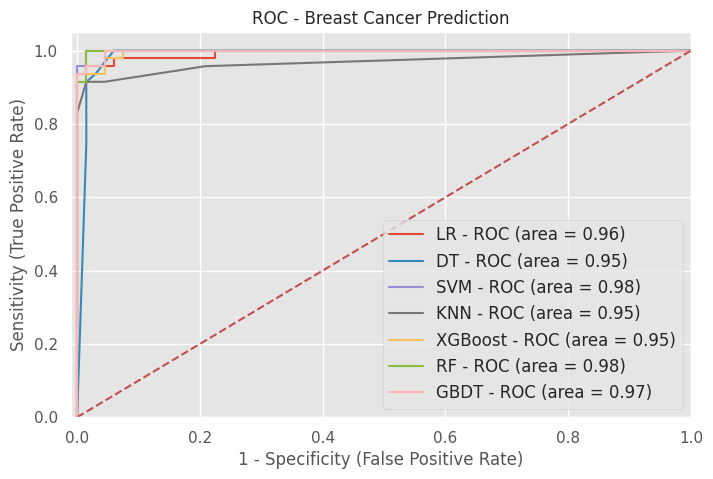

In [268]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[96.49, 94.74000000000001, 98.25, 95.61, 94.74000000000001, 97.37, 96.49]
[np.float64(96.06), np.float64(93.51), np.float64(97.87), np.float64(95.0), np.float64(94.57), np.float64(98.19), np.float64(96.7)]


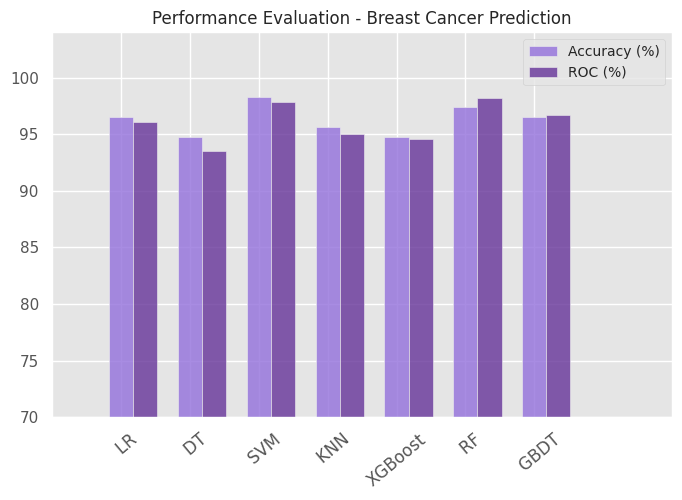

In [269]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()